In [4]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow as pa
import numpy as np
import pandas as pd

In [5]:
df = pl.read_csv("aac_intakes_outcomes.csv")

print(df.shape)
df.head()


(79672, 41)


age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
str,str,str,str,str,str,i64,f64,str,str,i64,i64,str,str,i64,f64,i64,i64,str,str,str,str,str,str,str,str,str,str,i64,i64,f64,str,str,i64,i64,str,str,i64,f64,str,f64
"""10 years""","""A006100""","""2007-07-09 00:00:00""",null,"""Return to Owner""","""Neutered Male""",3650,10.0,"""(7.5, 10.0]""","""2017-12-07 14:07:00""",12,2017,"""2017-12""","""Thursday""",0,1.0,2007,7,"""2017-12""","""10 years""","""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""Colony Creek And Hunters Trace…","""Normal""","""Stray""","""Neutered Male""",1,3650,10.0,"""(7.5, 10.0]""","""2017-12-07 00:00:00""",12,2017,"""2017-12""","""Thursday""",14,1.0,"""0 days 14:07:00.000000000""",0.588194
"""7 years""","""A006100""","""2007-07-09 00:00:00""",null,"""Return to Owner""","""Neutered Male""",2555,7.0,"""(5.0, 7.5]""","""2014-12-20 16:35:00""",12,2014,"""2014-12""","""Saturday""",16,2.0,2007,7,"""2014-12""","""7 years""","""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""8700 Research Blvd in Austin (…","""Normal""","""Public Assist""","""Neutered Male""",1,2555,7.0,"""(5.0, 7.5]""","""2014-12-19 10:21:00""",12,2014,"""2014-12""","""Friday""",10,2.0,"""1 days 06:14:00.000000000""",1.259722
"""6 years""","""A006100""","""2007-07-09 00:00:00""",null,"""Return to Owner""","""Neutered Male""",2190,6.0,"""(5.0, 7.5]""","""2014-03-08 17:10:00""",3,2014,"""2014-03""","""Saturday""",17,3.0,2007,7,"""2014-03""","""6 years""","""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""8700 Research in Austin (TX)""","""Normal""","""Public Assist""","""Neutered Male""",1,2190,6.0,"""(5.0, 7.5]""","""2014-03-07 14:26:00""",3,2014,"""2014-03""","""Friday""",14,3.0,"""1 days 02:44:00.000000000""",1.113889
"""10 years""","""A047759""","""2004-04-02 00:00:00""","""Partner""","""Transfer""","""Neutered Male""",3650,10.0,"""(7.5, 10.0]""","""2014-04-07 15:12:00""",4,2014,"""2014-04""","""Monday""",15,1.0,2004,4,"""2014-04""","""10 years""","""A047759""","""Dog""","""Dachshund""","""Tricolor""","""Austin (TX)""","""Normal""","""Owner Surrender""","""Neutered Male""",1,3650,10.0,"""(7.5, 10.0]""","""2014-04-02 15:55:00""",4,2014,"""2014-04""","""Wednesday""",15,1.0,"""4 days 23:17:00.000000000""",4.970139
"""16 years""","""A134067""","""1997-10-16 00:00:00""",null,"""Return to Owner""","""Neutered Male""",5840,16.0,"""(15.0, 17.5]""","""2013-11-16 11:54:00""",11,2013,"""2013-11""","""Saturday""",11,1.0,1997,10,"""2013-11""","""16 years""","""A134067""","""Dog""","""Shetland Sheepdog""","""Brown/White""","""12034 Research Blvd in Austin …","""Injured""","""Public Assist""","""Neutered Male""",1,5840,16.0,"""(15.0, 17.5]""","""2013-11-16 09:02:00""",11,2013,"""2013-11""","""Saturday""",9,1.0,"""0 days 02:52:00.000000000""",0.119444


In [6]:
df.null_count()

age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,43324,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# drop rows with null outcomes and sex
df = df.drop_nulls(subset=["outcome_type", "sex_upon_intake"])

In [8]:
# dropping columns with redundant information, keeping days for all time columns
df = df.drop(
    [
        "age_upon_outcome",
        "age_upon_outcome_(years)",
        "age_upon_outcome_age_group",
        "outcome_month",
        "outcome_monthyear",
        "outcome_weekday",
        "outcome_hour",
        "dob_year",
        "dob_monthyear",
        "age_upon_intake",
        "age_upon_intake_(years)",
        "age_upon_intake_age_group",
        "intake_month",
        "intake_monthyear",
        "intake_weekday",
        "intake_hour",
        "time_in_shelter",
    ]
)

# convert date columns to datetime type
df = df.with_columns(
    pl.col("date_of_birth").str.to_datetime(),
    pl.col("outcome_datetime").str.to_datetime(),
    pl.col("intake_datetime").str.to_datetime(),
)

df.head()

animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),outcome_datetime,outcome_year,outcome_number,dob_month,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),intake_datetime,intake_year,intake_number,time_in_shelter_days
str,datetime[μs],str,str,str,i64,datetime[μs],i64,f64,i64,str,str,str,str,str,str,str,str,i64,i64,datetime[μs],i64,f64,f64
"""A006100""",2007-07-09 00:00:00,null,"""Return to Owner""","""Neutered Male""",3650,2017-12-07 14:07:00,2017,1.0,7,"""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""Colony Creek And Hunters Trace…","""Normal""","""Stray""","""Neutered Male""",1,3650,2017-12-07 00:00:00,2017,1.0,0.588194
"""A006100""",2007-07-09 00:00:00,null,"""Return to Owner""","""Neutered Male""",2555,2014-12-20 16:35:00,2014,2.0,7,"""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""8700 Research Blvd in Austin (…","""Normal""","""Public Assist""","""Neutered Male""",1,2555,2014-12-19 10:21:00,2014,2.0,1.259722
"""A006100""",2007-07-09 00:00:00,null,"""Return to Owner""","""Neutered Male""",2190,2014-03-08 17:10:00,2014,3.0,7,"""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""8700 Research in Austin (TX)""","""Normal""","""Public Assist""","""Neutered Male""",1,2190,2014-03-07 14:26:00,2014,3.0,1.113889
"""A047759""",2004-04-02 00:00:00,"""Partner""","""Transfer""","""Neutered Male""",3650,2014-04-07 15:12:00,2014,1.0,4,"""A047759""","""Dog""","""Dachshund""","""Tricolor""","""Austin (TX)""","""Normal""","""Owner Surrender""","""Neutered Male""",1,3650,2014-04-02 15:55:00,2014,1.0,4.970139
"""A134067""",1997-10-16 00:00:00,null,"""Return to Owner""","""Neutered Male""",5840,2013-11-16 11:54:00,2013,1.0,10,"""A134067""","""Dog""","""Shetland Sheepdog""","""Brown/White""","""12034 Research Blvd in Austin …","""Injured""","""Public Assist""","""Neutered Male""",1,5840,2013-11-16 09:02:00,2013,1.0,0.119444


In [9]:
df_short = df.head(50000)
df_short.write_csv("data.csv")

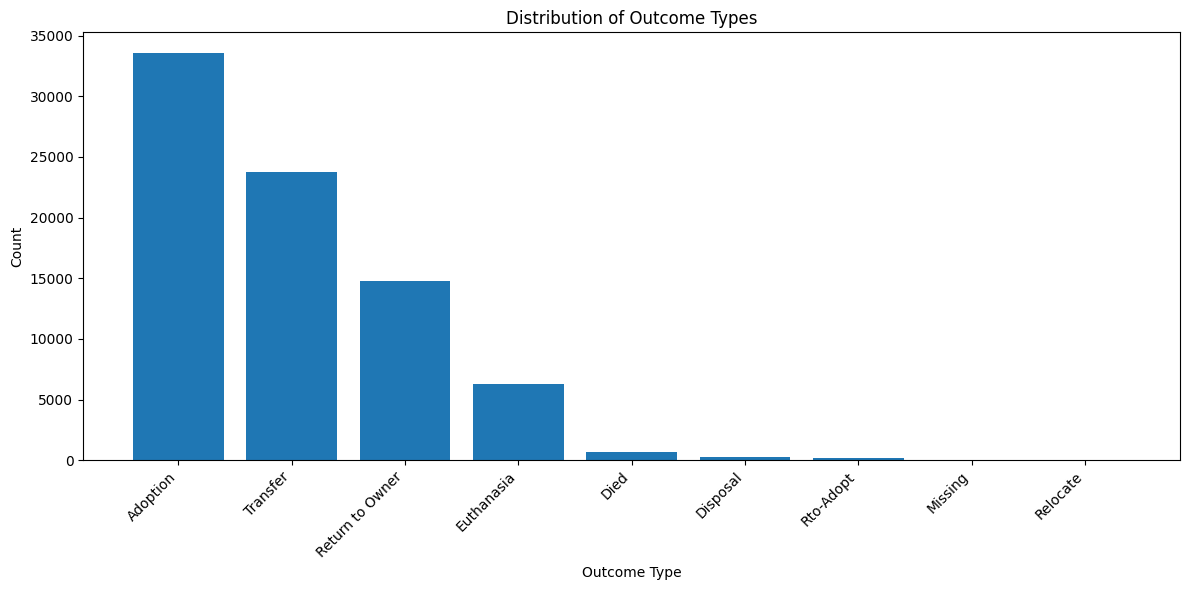

In [10]:

outcome_counts = df['outcome_type'].value_counts().sort('count', descending=True)

plt.figure(figsize=(12, 6))
plt.bar(outcome_counts['outcome_type'], outcome_counts['count'])
plt.title('Distribution of Outcome Types')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Observation AS: Can analyse reasons for 'Return to Owner' and 'Euthanasia' more ## 
## (AS) I've added some logic to do that below

In [11]:
# Analyse "Euthanasia" cases 

euth_analysis = df.filter(pl.col('outcome_type') == 'Euthanasia')\
                    .group_by('outcome_subtype')\
                    .agg([
                        pl.count('outcome_subtype').alias('count'),
                        pl.mean('time_in_shelter_days').alias('avg_time_in_shelter'),

                    ])\
                    .sort('count', descending=True)
euth_analysis.write_csv("euthanasia_reasons.csv")

# plt.figure(figsize=(10, 8))
# plt.pie(df['count'], labels=df['outcome_subtype'], autopct='%1.1f%%')
# plt.title('Reasons for Euthanasia')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.show()

# return_reasons = return_reasons.sort('count', descending=True)



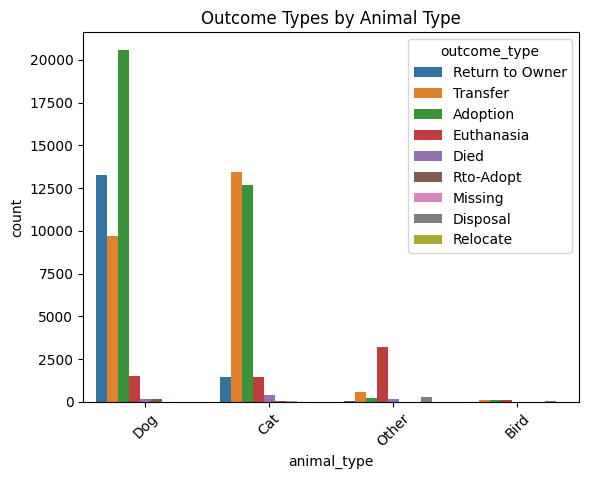

In [12]:
sns.countplot(data=df, x='animal_type', hue='outcome_type')
plt.title('Outcome Types by Animal Type')
plt.xticks(rotation=45)
plt.show()

## Observation (AS): Most euthanized cases are for 'Other' animal types : can analyse this more ## Handing over to Jackie

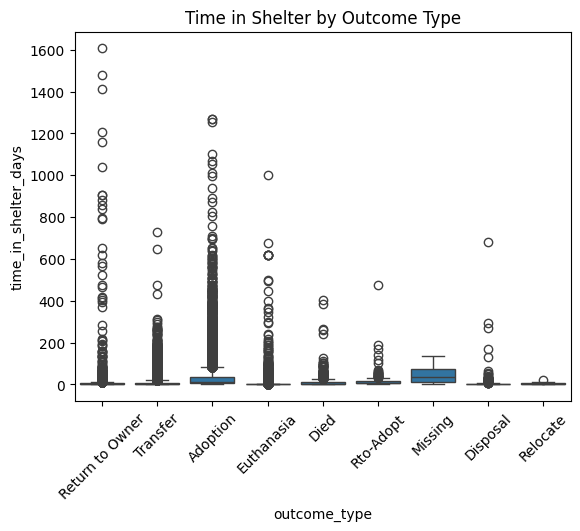

In [13]:
sns.boxplot(data=df, x='outcome_type', y='time_in_shelter_days')
plt.title('Time in Shelter by Outcome Type')
plt.xticks(rotation=45)
plt.show()

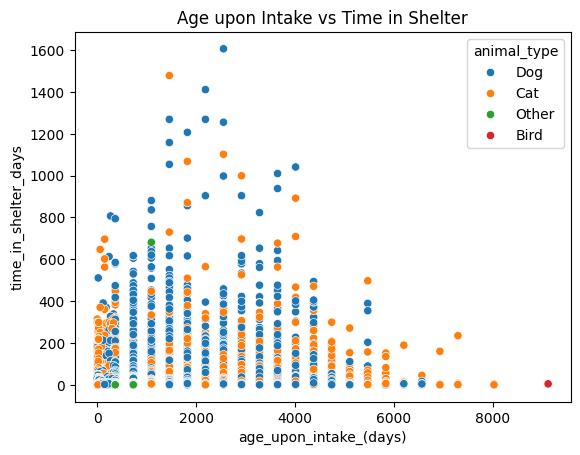

In [14]:
sns.scatterplot(data=df, x='age_upon_intake_(days)', y='time_in_shelter_days', hue='animal_type')
plt.title('Age upon Intake vs Time in Shelter')
plt.show()

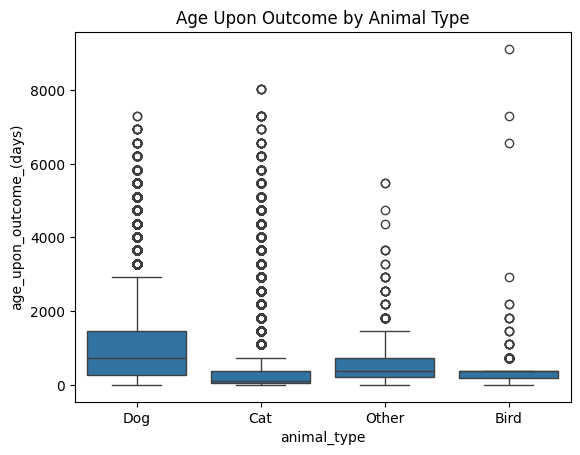

In [15]:
sns.boxplot(data=df, x='animal_type', y='age_upon_outcome_(days)')
plt.title('Age Upon Outcome by Animal Type')
plt.show()

/var/folders/my/6rpsqk_d5bq0zwz81l606m340000gp/T/ipykernel_37714/3562140208.py:4: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  top_breeds = df.filter(pl.col('animal_type') == 'Dog').group_by('breed').count().sort('count', descending=True).limit(10)


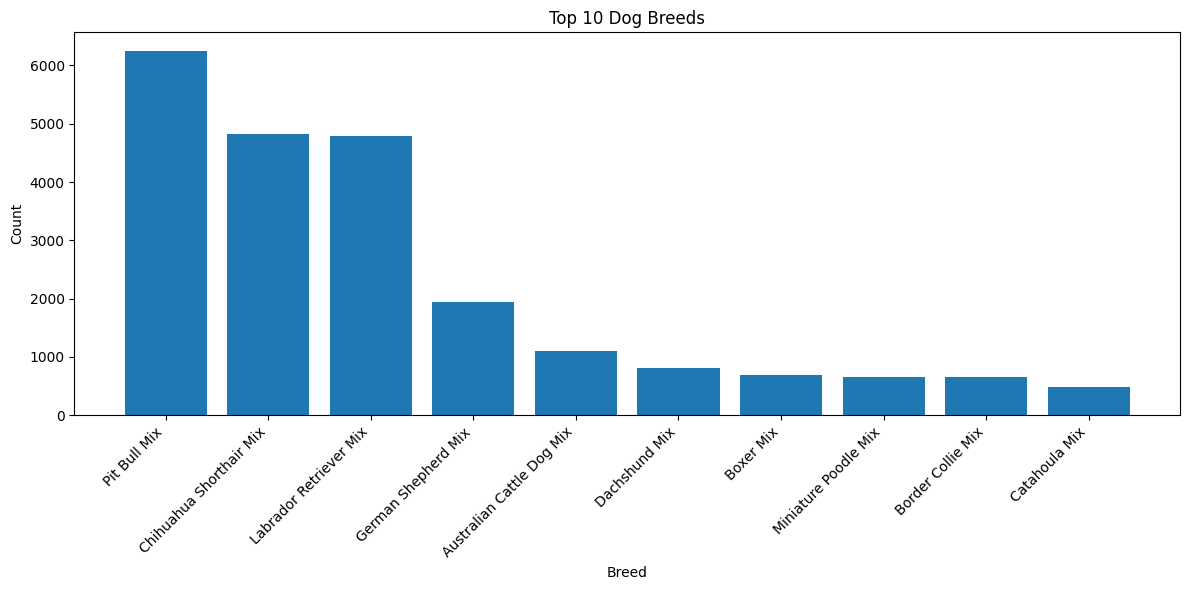

In [16]:
## Analysing trends for dog and cat adoption ### 

#top dog breeds
top_breeds = df.filter(pl.col('animal_type') == 'Dog').group_by('breed').count().sort('count', descending=True).limit(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_breeds['breed'], top_breeds['count'])

plt.title('Top 10 Dog Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

shape: (8, 3)
┌─────────────────┬───────┬────────────┐
│ outcome_type    ┆ count ┆ percentage │
│ ---             ┆ ---   ┆ ---        │
│ str             ┆ u32   ┆ f64        │
╞═════════════════╪═══════╪════════════╡
│ Adoption        ┆ 20581 ┆ 45.369574  │
│ Return to Owner ┆ 13272 ┆ 29.257324  │
│ Transfer        ┆ 9697  ┆ 21.376452  │
│ Euthanasia      ┆ 1502  ┆ 3.311068   │
│ Rto-Adopt       ┆ 143   ┆ 0.315235   │
│ Died            ┆ 142   ┆ 0.31303    │
│ Missing         ┆ 16    ┆ 0.035271   │
│ Disposal        ┆ 10    ┆ 0.022044   │
└─────────────────┴───────┴────────────┘


/var/folders/my/6rpsqk_d5bq0zwz81l606m340000gp/T/ipykernel_37714/1659411954.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  outcome_counts = dog_outcomes.group_by('outcome_type').agg(pl.count()).sort('count', descending=True)


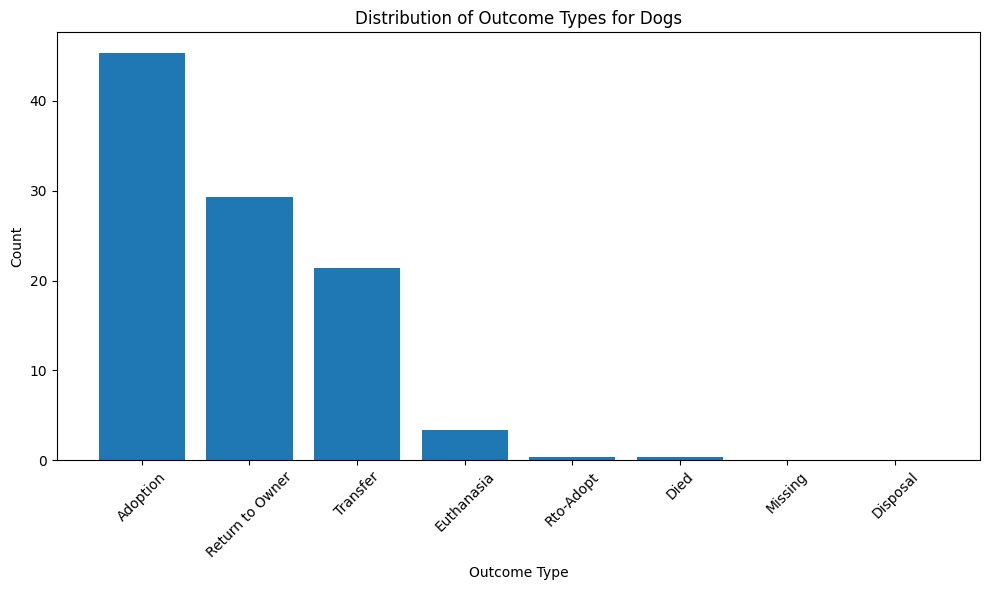

In [17]:
dog_outcomes = df.filter(pl.col('animal_type') == 'Dog')

outcome_counts = dog_outcomes.group_by('outcome_type').agg(pl.count()).sort('count', descending=True)
total_outcomes = outcome_counts['count'].sum()

# get outcome count by percentage for each breed
outcome_counts = outcome_counts.with_columns(
    (outcome_counts['count'] / total_outcomes * 100).alias('percentage')
)

print(outcome_counts)

## bar chart for outcome types for dogs ## 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(outcome_counts['outcome_type'], outcome_counts['percentage'])
plt.title('Distribution of Outcome Types for Dogs')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## pie chart ## KEEP ONE based on requirements
# outcome_types = outcome_counts["outcome_type"].to_list()
# percentages = outcome_counts["percentage"].to_list()

# print(outcome_types)
# plt.figure(figsize=(8, 8))
# plt.pie(
#     percentages,
#     labels=outcome_types,
#     autopct='%1.1f%%',
#     startangle=140,
# )
# plt.title("Dog Outcomes Percentage")
# plt.axis('equal') 
# plt.show()

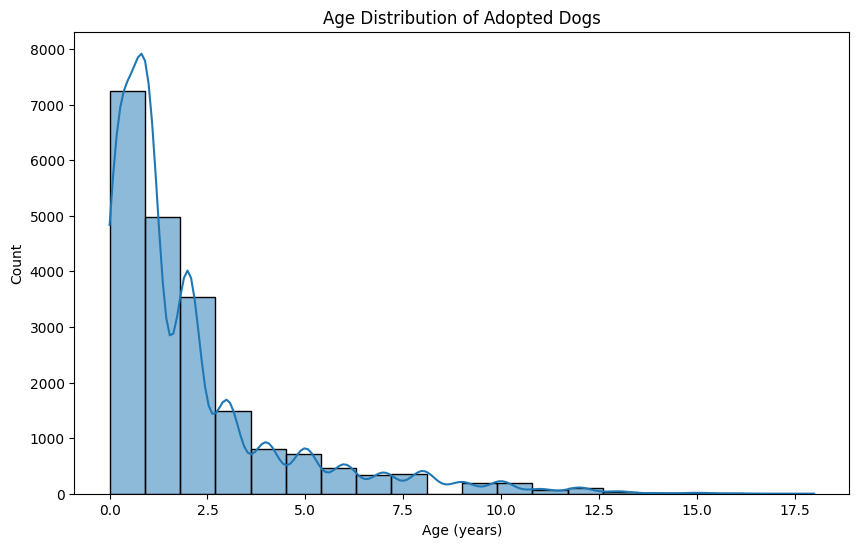

/var/folders/my/6rpsqk_d5bq0zwz81l606m340000gp/T/ipykernel_37714/2801030150.py:17: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  top_breeds = dogs_adopted.group_by('breed').count().sort('count', descending=True).limit(10)


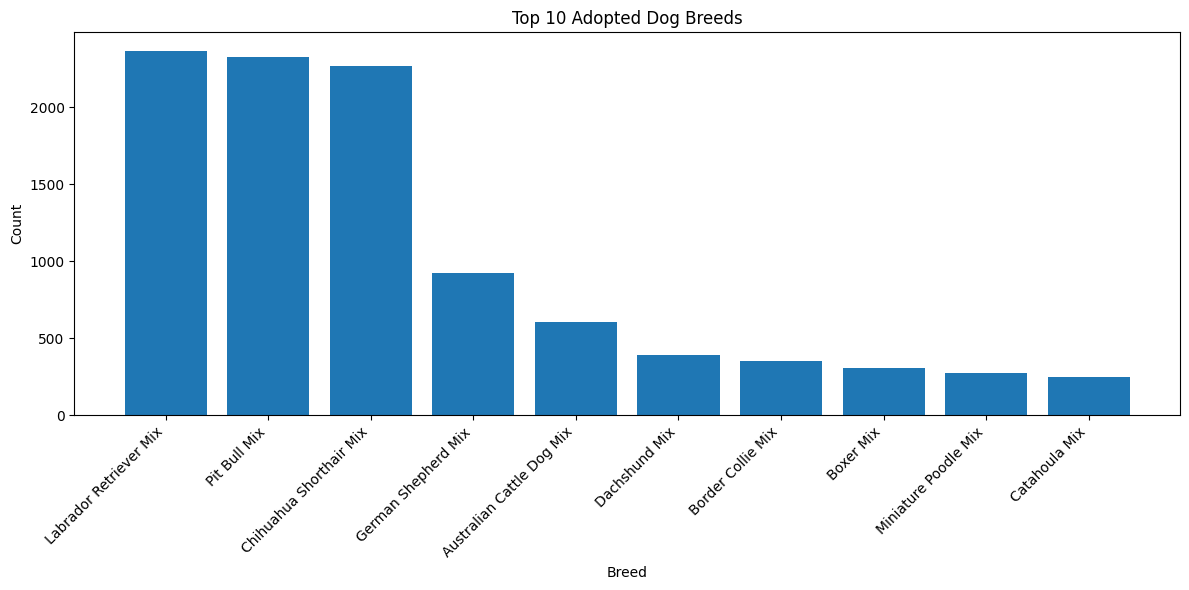

/var/folders/my/6rpsqk_d5bq0zwz81l606m340000gp/T/ipykernel_37714/2801030150.py:28: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  top_colors = dogs_adopted.group_by('color').count().sort('count', descending=True).limit(10)


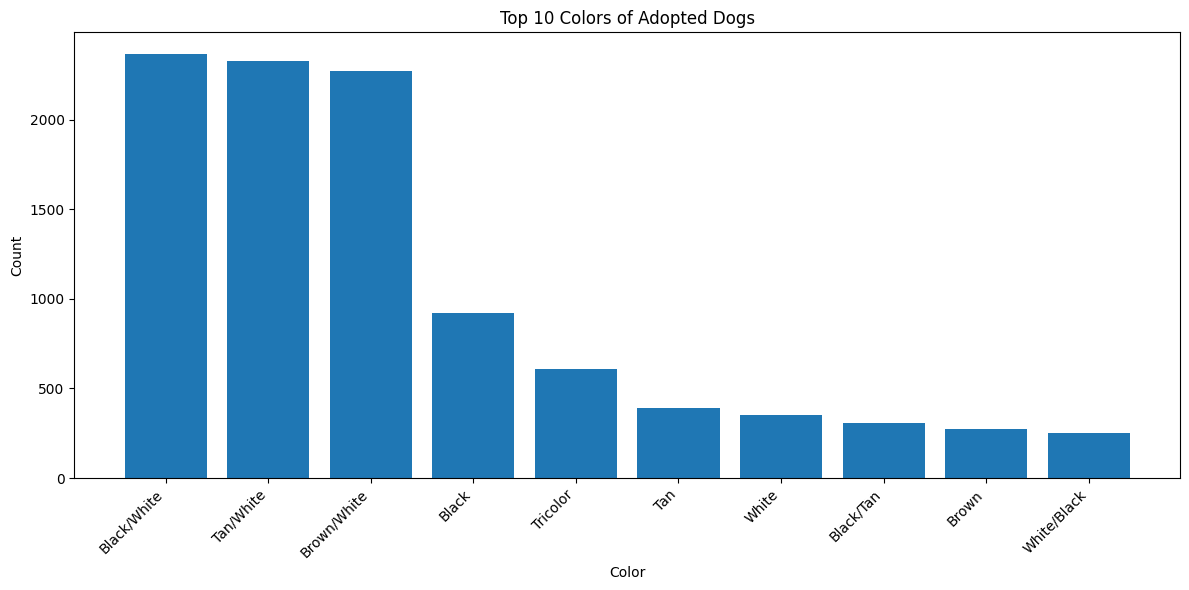

/var/folders/my/6rpsqk_d5bq0zwz81l606m340000gp/T/ipykernel_37714/2801030150.py:40: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  sex_counts = dogs_adopted.group_by('sex_upon_outcome').count().sort('count', descending=True)


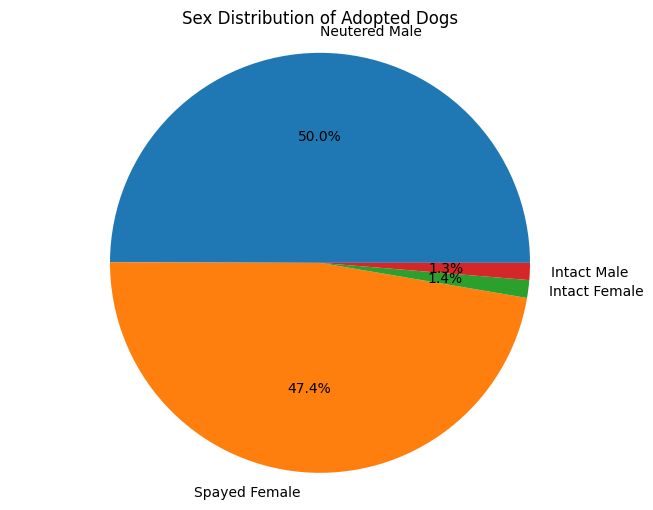

shape: (9, 5)
┌────────────┬─────────────────────────┬─────────────────────────┬──────────────┬──────────────────┐
│ statistic  ┆ age_upon_outcome_(days) ┆ breed                   ┆ color        ┆ sex_upon_outcome │
│ ---        ┆ ---                     ┆ ---                     ┆ ---          ┆ ---              │
│ str        ┆ f64                     ┆ str                     ┆ str          ┆ str              │
╞════════════╪═════════════════════════╪═════════════════════════╪══════════════╪══════════════════╡
│ count      ┆ 20581.0                 ┆ 20581                   ┆ 20581        ┆ 20581            │
│ null_count ┆ 0.0                     ┆ 0                       ┆ 0            ┆ 0                │
│ mean       ┆ 719.843934              ┆ null                    ┆ null         ┆ null             │
│ std        ┆ 856.141537              ┆ null                    ┆ null         ┆ null             │
│ min        ┆ 0.0                     ┆ Affenpinscher Mix       ┆ Agouti    

In [18]:
## see adoption trends for dogs ## 

## out of the dogs that are adopted what is their : age, breed, color, sex
dogs_adopted = df.filter(
    (pl.col('animal_type') == 'Dog') & 
    (pl.col('outcome_type') == 'Adoption')
)
# Age analysis
plt.figure(figsize=(10, 6))
sns.histplot(dogs_adopted['age_upon_outcome_(days)'] / 365, bins=20, kde=True)
plt.title('Age Distribution of Adopted Dogs')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

# # Top adopted breeds
top_breeds = dogs_adopted.group_by('breed').count().sort('count', descending=True).limit(10)
plt.figure(figsize=(12, 6))
plt.bar(top_breeds['breed'].to_list(), top_breeds['count'].to_list())
plt.title('Top 10 Adopted Dog Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# # Color analysis
top_colors = dogs_adopted.group_by('color').count().sort('count', descending=True).limit(10)

plt.figure(figsize=(12, 6))
plt.bar(top_colors['color'].to_list(), top_breeds['count'].to_list())
plt.title('Top 10 Colors of Adopted Dogs')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# # Sex analysis
sex_counts = dogs_adopted.group_by('sex_upon_outcome').count().sort('count', descending=True)

plt.figure(figsize=(8, 6))
plt.pie(sex_counts['count'], labels=sex_counts['sex_upon_outcome'], autopct='%1.1f%%')
plt.title('Sex Distribution of Adopted Dogs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

print(dogs_adopted[['age_upon_outcome_(days)', 'breed', 'color', 'sex_upon_outcome']].describe())


/var/folders/my/6rpsqk_d5bq0zwz81l606m340000gp/T/ipykernel_37714/4047143139.py:3: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  top_breeds = df.filter(pl.col('animal_type') == 'Cat').group_by('breed').count().sort('count', descending=True).limit(10)


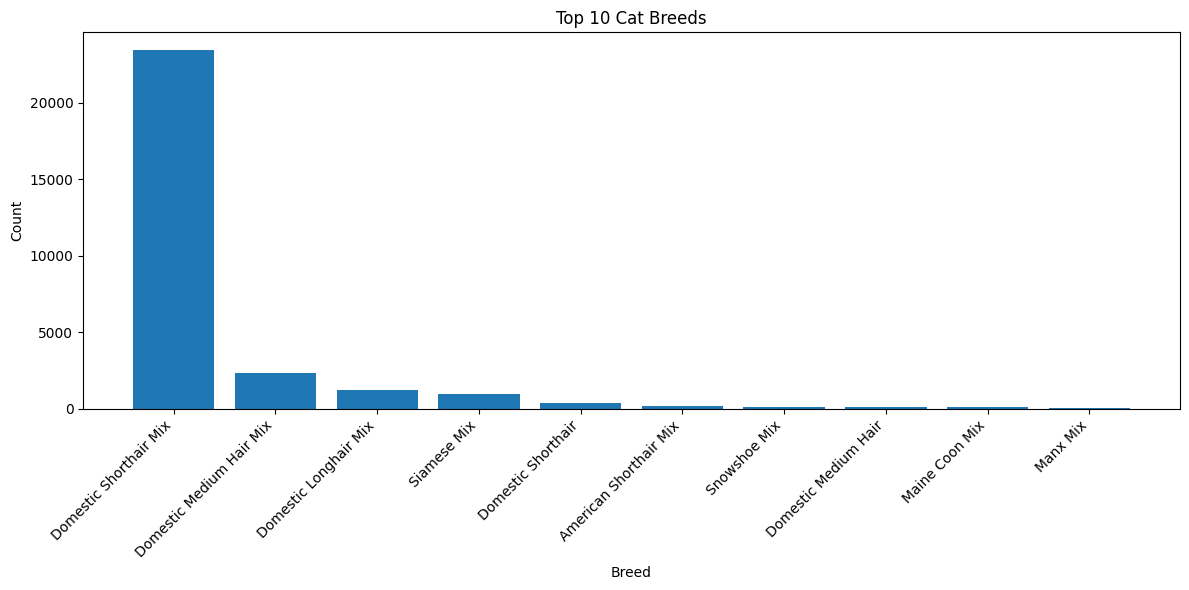

In [19]:
## Above analysis can be done for cats or any other animal 
#top cat breeds
top_breeds = df.filter(pl.col('animal_type') == 'Cat').group_by('breed').count().sort('count', descending=True).limit(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_breeds['breed'], top_breeds['count'])

plt.title('Top 10 Cat Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [20]:
# # Select numerical columns
# numerical_cols = df.select(pl.col(pl.NUMERIC_DTYPES)).columns

# # Create histograms
# fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 5))
# for i, col in enumerate(numerical_cols):
#     axes[i].hist(df[col].to_numpy())
#     axes[i].set_title(col)
# plt.tight_layout()
# plt.show()

In [21]:
# Create box plots
# plt.figure(figsize=(15, 5))
# plt.boxplot([df[col].to_numpy() for col in numerical_cols])
# plt.title('Box Plots of Numerical Variables')
# plt.xticks(range(1, len(numerical_cols) + 1), numerical_cols, rotation=45)
# plt.show()

In [1]:

# # Assuming df is your Polars DataFrame
# categorical_cols = df.select(pl.col(pl.Utf8)).columns

# # Create bar plots
# for col in categorical_cols:
#     plt.figure(figsize=(10, 6))
    
#     # Calculate value counts
#     value_counts = df[col].value_counts().sort("count", descending=True)
    
#     # Extract values and counts from the struct column
#     values = value_counts[col].to_list()
#     counts = value_counts["count"].to_list()
    
#     # # Create bar plot
#     # plt.bar(values, counts)
    
#     # plt.title(f'Bar Plot of {col}')
#     # plt.xlabel(col)
#     # plt.ylabel('Count')
#     # plt.xticks(rotation=45, ha='right')
#     # plt.tight_layout()
#     # plt.show()

NameError: name 'df' is not defined

/var/folders/my/6rpsqk_d5bq0zwz81l606m340000gp/T/ipykernel_37714/499912864.py:2: DeprecationWarning: `NUMERIC_DTYPES` is deprecated. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  numerical_cols = df.select(pl.col(pl.NUMERIC_DTYPES)).columns
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


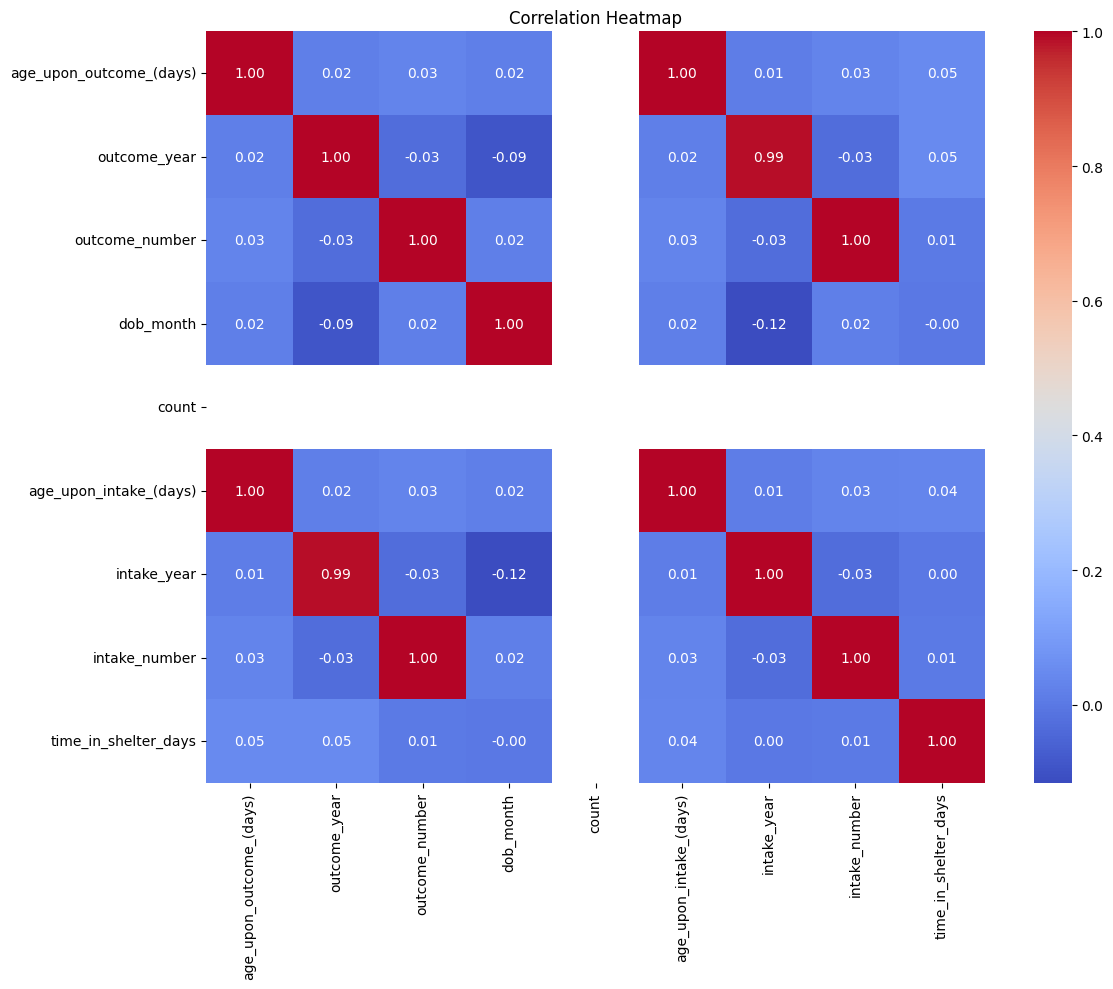

In [22]:
# correlation between numerical columns
numerical_cols = df.select(pl.col(pl.NUMERIC_DTYPES)).columns

data = df.select(numerical_cols).to_numpy()
corr_matrix = np.corrcoef(data, rowvar=False)

import pandas as pd
corr_matrix_pandas = pd.DataFrame(corr_matrix, columns=numerical_cols, index=numerical_cols)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_pandas, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()